In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("News.csv",index_col=0)
data.head()

,title,text,subject,date,class
0.0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,0.0
1.0,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,0.0
2.0,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,0.0
3.0,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,0.0
4.0,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,0.0


In [5]:
data.shape

(44940, 5)

In [7]:
data=data.drop(['title','date','subject'],axis=1)
data

,text,class
0.0,Donald Trump just couldn t wish all Americans ...,0.0
1.0,House Intelligence Committee Chairman Devin Nu...,0.0
2.0,"On Friday, it was revealed that former Milwauk...",0.0
3.0,"On Christmas day, Donald Trump announced that ...",0.0
4.0,Pope Francis used his annual Christmas Day mes...,0.0
...,...,...
21412.0,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1.0
21413.0,"LONDON (Reuters) - LexisNexis, a provider of l...",1.0
21414.0,MINSK (Reuters) - In the shadow of disused Sov...,1.0
21415.0,MOSCOW (Reuters) - Vatican Secretary of State ...,1.0


In [9]:
data.isnull().sum()

text     21
class    42
dtype: int64

In [11]:
data=data.dropna()

In [13]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [15]:
# Shuffling
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)

In [17]:
data

,text,class
0,In 2008 Barack Obama promised to shut down the...,0.0
1,In spite of Senator John McCain s promise to h...,0.0
2,WASHINGTON (Reuters) - U.S. lawmakers sharply ...,1.0
3,BEIRUT (Reuters) - A member of the political p...,1.0
4,Donald Trump took to Twitter to defend his Mus...,0.0
...,...,...
44893,(Reuters) - The United States Military Academy...,1.0
44894,This is why elections have consequences. Durin...,0.0
44895,NEW YORK (Reuters) - With the U.S. election ju...,1.0
44896,WASHINGTON (Reuters) - U.S. President Donald T...,1.0


<Axes: xlabel='class', ylabel='count'>

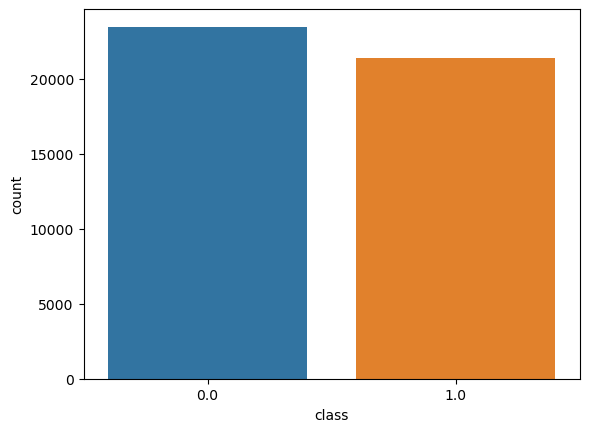

In [19]:
sns.countplot(data=data,
              x='class',
              order=data['class'].value_counts().index)

In [37]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
data

,text,class
0,In 2008 Barack Obama promised to shut down the...,0.0
1,In spite of Senator John McCain s promise to h...,0.0
2,WASHINGTON (Reuters) - U.S. lawmakers sharply ...,1.0
3,BEIRUT (Reuters) - A member of the political p...,1.0
4,Donald Trump took to Twitter to defend his Mus...,0.0
...,...,...
44893,(Reuters) - The United States Military Academy...,1.0
44894,This is why elections have consequences. Durin...,0.0
44895,NEW YORK (Reuters) - With the U.S. election ju...,1.0
44896,WASHINGTON (Reuters) - U.S. President Donald T...,1.0


In [41]:
stopword=stopwords.words('english')
ps=PorterStemmer()
corpus=[]
for i in range(len(data)):
    text=re.sub('[^a-zA-Z]',' ',data['text'][i])
    text=text.lower()
    text=text.split()
    text=[ps.stem(word) for word in text if word not in stopword]
    text=" ".join(text)
    corpus.append(text)
corpus

['barack obama promis shut coal industri hillari also promis shut coal industri part campaign platform politician like barack obama hillari put special interest lobbyist use phoni climat chang collect billion feder green subsidi work american know peopl longer public servant instead self servant watch time long ago citi ohio river employ peopl steel mill whose rust warehous still line street figur closer first cost associ repeat regul impos environment protect agenc pass north american free trade agreement nafta cheaper competit place mexico end way weirton could compet industri fed cloth citi gener essenti die husband introduc nafta said former steel worker sit bar columbia club locat one gate weirton steel corpor main factori work plant year anyon state vote crazi commun donald trump target hard pitch evil nafta need bring job well paid manufactur job particular back america poll collect realclearpolit suggest lead hillari clinton west virginia point polici hard detail mr trump vow r

In [47]:
data['text']=corpus

In [49]:
data

,text,class
0,barack obama promis shut coal industri hillari...,0.0
1,spite senat john mccain promis constitu month ...,0.0
2,washington reuter u lawmak sharpli critic pres...,1.0
3,beirut reuter member polit parti saad al harir...,1.0
4,donald trump took twitter defend muslim ban su...,0.0
...,...,...
44893,reuter unit state militari academi pois first ...,1.0
44894,elect consequ year elect one thew bright spot ...,0.0
44895,new york reuter u elect day away american expe...,1.0
44896,washington reuter u presid donald trump said w...,1.0


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [53]:
x_train, x_test, y_train, y_test = train_test_split(data['text'],data['class'],test_size=0.25)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
x_train=tfidf.fit_transform(x_train)
x_test=tfidf.transform(x_test)

In [57]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [59]:
y_pred=lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.9858351893095768

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [63]:
y_pred=dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.9955456570155902

In [75]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
cm

array([[5855,   24],
       [  26, 5320]], dtype=int64)

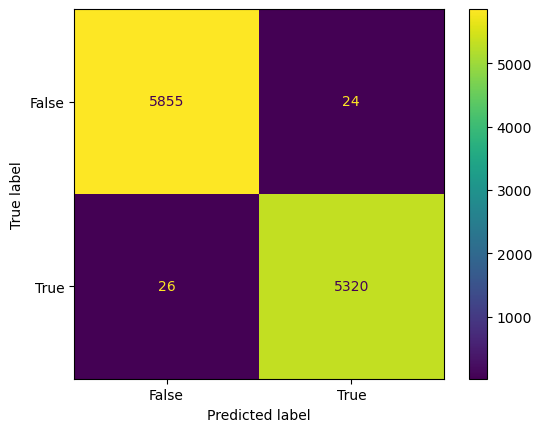

In [77]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
cm_display.plot()
plt.show()

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5879
         1.0       1.00      1.00      1.00      5346

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225

